### Question: 

### Write a program to identify the best ML model in terms of accuracy for the wine dataset. Compare minimum 5 algorithms using boxplot and select the best one.

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Loading the Wine Dataset

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

In [4]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

### Evaluation

In [5]:
#Cross validation
results = []
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append((model_name, cv_scores))

In [6]:
results_df = pd.DataFrame({name: scores for name, scores in results})

### Visualization

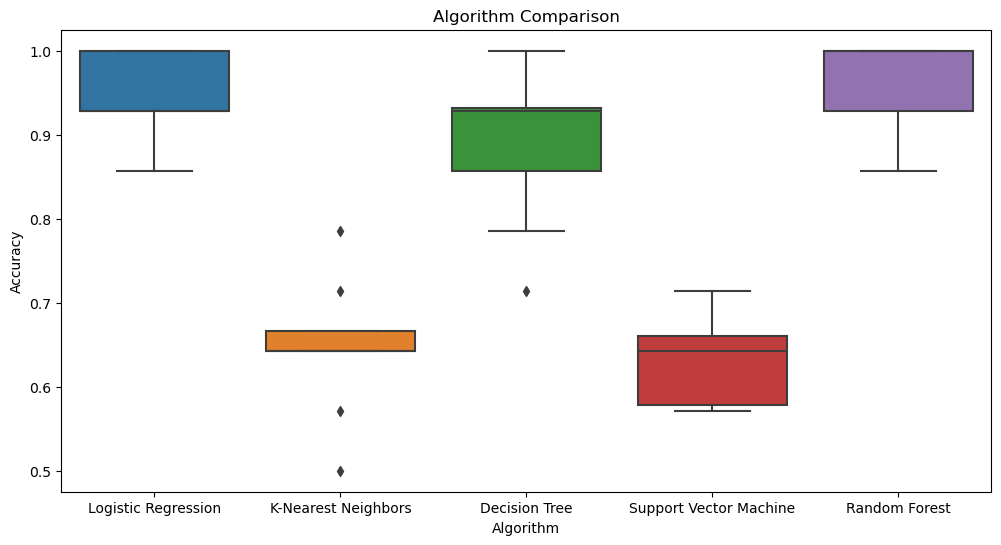

In [7]:
# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=results_df)
plt.title('Algorithm Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()

### Best model

In [8]:
mean_scores = results_df.mean()
best_model_name = mean_scores.idxmax()
best_model_score = mean_scores.max()

In [9]:
print(f'The best model is {best_model_name} with a mean accuracy of {best_model_score:.2f}')

The best model is Random Forest with a mean accuracy of 0.96


### Training the Best Model 

In [10]:
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluating the best model

In [11]:
test_accuracy = best_model.score(X_test, y_test)

In [12]:
print(f'Test set accuracy of the best model ({best_model_name}): {test_accuracy:.2f}')

Test set accuracy of the best model (Random Forest): 1.00
